#SB-SAT fixation data analysis 
Source: https://github.com/ahnchive/SB-SAT/ <br>
The GitHub repository contains the following folders: fixations, model, stimuli. In this notebook, I'm doing some data exploration on the 3 files in the "fixations" folder: 
- 18sat_fixfinal.csv
- 18sat_labels.csv
- 18sat_trialfinal.csv

In this notebook, there is analysis on the first two csv files: 
- Fixation data
- Self-assessment questionnaire
- Comprehension scores
- Information on subjects


Other analysis cited in the thesis (text length etc. and annotated text) can be found in SBSAT_annotated_texts_analysis.ipynb. 

Some basic analysis of the stimuli to get an idea of possible features.

## 0. Load data

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_labels = "/content/drive/MyDrive/_Masterarbeit/SBSAT_Data/SB-SAT-master/fixation/18sat_labels.csv"
path_fixations = "/content/drive/MyDrive/_Masterarbeit/SBSAT_Data/SB-SAT-master/fixation/18sat_fixfinal.csv"

## preliminary functions:


In [ ]:
def get_columns(df):
  """Function to get all column labels of a pd dataframe."""
  column_names = list(df.columns.values)
  data_types = list(df.dtypes)

  columns = []
  i = 1
  for column, dtype in zip(column_names, data_types): 
    columns.append(''.join(["Column ", str(i),":\t", column, "\t(",str(dtype),")"]))
    i+=1
    
  return columns

## 1. Fixations Dataframe
"18sat_fixfinal.csv"

In [ ]:
df_fix = pd.read_csv(path_fixations, sep=',')

In [ ]:
df_fix.head(10)

,RECORDING_SESSION_LABEL,TRIAL_INDEX,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_PUPIL,CURRENT_FIX_DURATION,CURRENT_FIX_INTEREST_AREA_ID,CURRENT_FIX_INTEREST_AREA_LABEL,CURRENT_FIX_INTEREST_AREA_PIXEL_AREA,CURRENT_FIX_INTEREST_AREA_RUN_ID,...,Trial_Recycled_,total_page,type,book_name,book,page,RT,answer,correct_answer,page_name
0,msd001,1,59.8,125.4,1430.0,22,NaN,NaN,NaN,NaN,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1
1,msd001,1,348.7,182.0,1375.0,26,24.0,long,3520.0,1.0,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1
2,msd001,1,630.5,400.3,1365.0,216,72.0,safe,3136.0,1.0,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1
3,msd001,1,492.0,400.2,1440.0,125,69.0,boundless,7488.0,1.0,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1
4,msd001,1,526.6,390.5,1265.0,486,70.0,"world,",4992.0,1.0,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1
5,msd001,1,545.8,397.9,1157.0,371,70.0,"world,",4992.0,1.0,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1
6,msd001,1,525.7,181.8,1089.0,158,27.0,other,4096.0,1.0,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1
7,msd001,1,831.0,55.6,1025.0,139,NaN,NaN,NaN,NaN,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1
8,msd001,1,167.3,124.8,1348.0,194,4.0,Even,6512.0,1.0,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1
9,msd001,1,270.9,111.3,1382.0,210,6.0,my,2960.0,1.0,...,True,5,reading,dickens,1,1,25094.538413,1,-99,reading-dickens-1


In [ ]:
print("page:\t", df_fix['page'].unique())

page:	 [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [ ]:
#number of columns and rows
print("Number of columns: ", df_fix.shape[1])
print("Number of rows: ", df_fix.shape[0])

Number of columns:  29
Number of rows:  463564


In [ ]:
# Display all column labels
for col in get_columns(df_fix):
  print(col)

Column 1:	RECORDING_SESSION_LABEL	(object)
Column 2:	TRIAL_INDEX	(int64)
Column 3:	CURRENT_FIX_X	(float64)
Column 4:	CURRENT_FIX_Y	(float64)
Column 5:	CURRENT_FIX_PUPIL	(float64)
Column 6:	CURRENT_FIX_DURATION	(int64)
Column 7:	CURRENT_FIX_INTEREST_AREA_ID	(float64)
Column 8:	CURRENT_FIX_INTEREST_AREA_LABEL	(object)
Column 9:	CURRENT_FIX_INTEREST_AREA_PIXEL_AREA	(float64)
Column 10:	CURRENT_FIX_INTEREST_AREA_RUN_ID	(float64)
Column 11:	CURRENT_FIX_INTEREST_AREA_DWELL_TIME	(float64)
Column 12:	PREVIOUS_SAC_DIRECTION	(object)
Column 13:	PREVIOUS_SAC_ANGLE	(float64)
Column 14:	PREVIOUS_SAC_AMPLITUDE	(float64)
Column 15:	PREVIOUS_SAC_AVG_VELOCITY	(float64)
Column 16:	PREVIOUS_SAC_CONTAINS_BLINK	(object)
Column 17:	PREVIOUS_SAC_BLINK_DURATION	(float64)
Column 18:	Session_Name_	(object)
Column 19:	Trial_Index_	(int64)
Column 20:	Trial_Recycled_	(bool)
Column 21:	total_page	(int64)
Column 22:	type	(object)
Column 23:	book_name	(object)
Column 24:	book	(int64)
Column 25:	page	(int64)
Column 26

In [ ]:
df_fix["type"].unique()

array(['reading', 'question'], dtype=object)

In [ ]:
# df shape
print("Number of fixations, total:")
print(df_fix.shape[0])
print("Number of fixations, only reading screens: ")
subdf_screens = df_fix.drop(df_fix[df_fix['type'] == 'question'].index)
print(subdf_screens.shape[0])

Number of fixations, total:
463564
Number of fixations, only reading screens: 
263032


Missing datapoints: <br>

There are 59 subjects * 22 screens -> there should be 1298 screens read. However, there are some screens missing: 

In [ ]:
subdf_screens = df_fix.drop(df_fix[df_fix['type'] == 'question'].index)
subdf_screens = subdf_screens.loc[:, ['RECORDING_SESSION_LABEL', 'book', 'page']].drop_duplicates()
print("There are ", subdf_screens.shape[0], "different combinations of subj&screens in the dataset")

There are  2054 different combinations of subj&screens in the dataset


In [ ]:
print("There should be ", 22*95, "different combinations of subj&screens --> Therefore, some got deleted or subjs didn't look at all screens!")

There should be  2090 different combinations of subj&screens --> Therefore, some got deleted or subjs didn't look at all screens!


In [ ]:
# intersting columns
print("types:\t", df_fix['type'].unique())
print("book_name:\t", df_fix['book_name'].unique())
print("book:\t", df_fix['book'].unique())
print("page:\t", df_fix['page'].unique())
print("RT:\t", df_fix['RT'].unique())
print("answer:\t", df_fix['answer'].unique())
print("correct_answer:\t", df_fix['correct_answer'].unique())
print("page_name:\t", df_fix['type'].unique())

types:	 ['reading' 'question']
book_name:	 ['dickens' 'flytrap' 'genome' 'northpole']
book:	 [1 2 3 4]
page:	 [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
RT:	 [25094.5384131  24160.4984131  23271.4344131  ...  1572.57701348
  1951.11301348   795.17101347]
answer:	 [ 1  0  3  4  2 -1]
correct_answer:	 [-99   1   3   4   2]
page_name:	 ['reading' 'question']


In [ ]:
# Find unique values in certain columns
# Information on session, text etc.
print("Sessions, Trials:\nSubject IDs\t:", sorted(df_fix['RECORDING_SESSION_LABEL'].unique())) #subject id
print("Number of unique Subject IDs:\t", len(df_fix['RECORDING_SESSION_LABEL'].unique()))
print("Trial IDs:\t", df_fix['TRIAL_INDEX'].unique())
print("\nBooks, Pages:\nType\t:", sorted(df_fix['type'].unique())) # whether the screen belongs to question or reading screen
print("Book\t:", sorted(df_fix['book'].unique()), sorted(df_fix['book_name'].unique())) #reading passage name id, integer id
print("Page\t:", sorted(df_fix['page'].unique()), sorted(df_fix['page_name'].unique())) # current page number for each reading passage, for questions and reading
print("Total page\t:", sorted(df_fix['total_page'].unique())) # total page number for each reading passage
# reading time
#print("Reading time:\t", sorted(df_fix['RT'].unique())) # total reading time for each page
# answers
print("\nQuestions, Answers:")
print("answer\t:", sorted(df_fix['answer'].unique())) # subject's key response --> why -1?? Leertaste oder so? TODO subframe with only questions
print("correct_answer\t:", sorted(df_fix['correct_answer'].unique())) # -99 used as replacement in reading pages

Sessions, Trials:
Subject IDs	: ['msd001', 'msd002', 'msd003', 'msd004', 'msd005', 'msd007', 'msd008', 'msd009', 'msd010', 'msd011', 'msd012', 'msd015', 'msd017', 'msd018', 'msd019', 'msd020', 'msd021', 'msd022', 'msd023', 'msd024', 'msd025', 'msd026', 'msd027', 'msd028', 'msd030', 'msd031', 'msd032', 'msd033', 'msd034', 'msd035', 'msd036', 'msd037', 'msd038', 'msd040', 'msd041', 'msd042', 'msd043', 'msd044', 'msd045', 'msd046', 'msd047', 'msd048', 'msd049', 'msd050', 'msd051', 'msd053', 'msd054', 'msd055', 'msd056', 'msd057', 'msd058', 'msd059', 'msd061', 'msd062', 'msd063', 'msd064', 'msd065', 'msd066', 'msd068', 'msd069', 'msd070', 'msd071', 'msd072', 'msd073', 'msd074', 'msd075', 'msd077', 'msd078', 'msd079', 'msd080', 'msd081', 'msd082', 'msd083', 'msd084', 'msd085', 'msd086', 'msd087', 'msd089', 'msd090', 'msd091', 'msd092', 'msd093', 'msd094', 'msd095', 'msd096', 'msd097', 'msd098', 'msd099', 'msd100', 'msd101', 'msd102', 'msd103', 'msd105', 'msd106', 'msd107']
Number of unique 

In [ ]:
print("Correct answer:\n", df_fix['correct_answer'].value_counts())
print("\nAnswer given by subjects:\n", df_fix['answer'].value_counts())

Correct answer:
 -99    300822
 3      46464
 2      46447
 1      43877
 4      25954
Name: correct_answer, dtype: int64

Answer given by subjects:
  1    273811
 3     60431
 2     58584
 4     41557
 0     23000
-1      6181
Name: answer, dtype: int64


## Comprehension Questions & Answers
In fixations dataframe

In [ ]:
# sub df with answers, correct answers for type questions
questions = df_fix[df_fix["type"] == 'question']
questions = questions[["RECORDING_SESSION_LABEL", "book", "page", "answer", "correct_answer"]]
questions = questions.drop_duplicates()
questions = questions[questions.correct_answer != -99] # reading screens
questions["correct_anwer_given"] = (questions["answer"] == questions["correct_answer"]).astype(int)
questions.head(10)

,RECORDING_SESSION_LABEL,book,page,answer,correct_answer,correct_anwer_given
510,msd001,1,1,1,1,1
618,msd001,1,2,3,3,1
720,msd001,1,3,3,1,0
774,msd001,1,4,4,4,1
859,msd001,1,5,2,3,0
1729,msd001,2,1,1,1,1
1789,msd001,2,2,3,3,1
1862,msd001,2,3,4,4,1
1942,msd001,2,4,2,2,1
2047,msd001,2,5,4,2,0


In [ ]:
# Get number of correct answers by subject and book
questions_grouped = questions.groupby(['RECORDING_SESSION_LABEL', 'book'], as_index=False)['correct_anwer_given'].sum()
questions_grouped = questions_grouped.rename(columns={'correct_answer': 'total_correct_answers'})
questions_grouped = questions_grouped.drop_duplicates()
questions_grouped.head()

,RECORDING_SESSION_LABEL,book,correct_anwer_given
0,msd001,1,3
1,msd001,2,4
2,msd001,3,4
3,msd001,4,4
4,msd002,1,3


In [ ]:
questions_grouped.columns

Index(['RECORDING_SESSION_LABEL', 'book', 'correct_anwer_given'], dtype='object')

In [ ]:
questions_grouped.groupby(['book'])['correct_anwer_given'].agg(['min', 'max', 'median'])


,min,max,median
book,,,
1,0,5,3.0
2,0,5,3.0
3,0,5,2.0
4,0,5,3.0


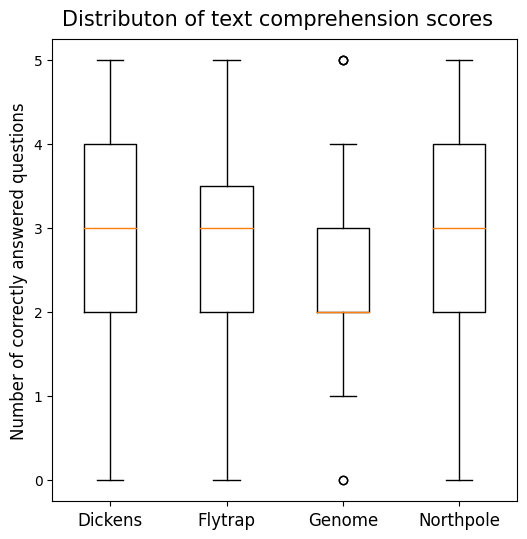

In [ ]:
import matplotlib.pyplot as plt

label = {1:'Dickens', 2:'Flytrap', 3:'Genome', 4: 'Northpole'}

# Group the DataFrame by 'text_id'
df_grouped = questions_grouped.groupby('book')

# Create a list to store the box plot data for each group
data = []
for text_id, group in df_grouped:
    data.append(group['correct_anwer_given'])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 6))

# Create a boxplot for each group
ax.boxplot(data)

# Set the x-tick labels and tick positions
ax.set_xticklabels([label[text_id] for text_id, _ in df_grouped], fontsize=12)
ax.set_xticks(range(1, len(df_grouped)+1))

# Add a y-axis label
ax.set_ylabel('Number of correctly answered questions', fontsize=12)

# Add a title to the figure
fig.suptitle('Distributon of text comprehension scores', y=0.93, fontsize=15)

# Show the plot
plt.show()


In [ ]:
# how often the correct answer by text
print(questions.groupby['correct_anwer_given'].value_counts())

TypeError: ignored

In [ ]:
# how often was the correct answer given for a page?
for i in sorted(df_fix['page_name'].unique()):
  answered_correctly = len(questions[(questions["page_name"]==i) & (questions["answer"]==questions["correct_answer"])])
  if answered_correctly != 0: 
    print(i, ":\t", answered_correctly, "participants answered the question correctly.")

In [ ]:
# Only 17 participants answered question 5 for dickens correctly. what did they answer?
# correct answer: 
subdf_1_5  = questions[(questions["book"] == 1)&(questions["page"] == 5)]
ans_corr = subdf_1_5['correct_answer'].unique()[0]
print("correct answer: ", ans_corr)

# participants answers: 
subdf_1_5["answer"].value_counts()

correct answer:  3


2    63
3    17
4    11
1     4
Name: answer, dtype: int64

# 2. Labels Dataframe
"18sat_labels.csv" <br>
Self-assessment questionnaire, filled out after each passage.

In [ ]:
df_lab = pd.read_csv(path_labels, sep=',')
# sub dataframes for the books
df_lab_dickens = df_lab[df_lab["book"] == "dickens"]
df_lab_flytrap = df_lab[df_lab["book"] == "flytrap"]
df_lab_genome = df_lab[df_lab["book"] == "genome"]
df_lab_northpole = df_lab[df_lab["book"] == "northpole"]

In [ ]:
df_lab.head(5)

,subj,book,acc,confidence,difficulty,familiarity,recognition,interest,pressured,sleepiness,sleephours,acc_level,subj_acc,language,sex,native,subj_acc_level
0,msd001,dickens,0.6,2,0,1,0,2,0,1,2,2,0.75,English,F,1,3
1,msd001,flytrap,0.8,2,1,2,0,2,1,1,2,3,0.75,English,F,1,3
2,msd001,genome,0.8,1,0,1,0,2,1,2,2,3,0.75,English,F,1,3
3,msd001,northpole,0.8,1,1,1,0,1,1,2,2,3,0.75,English,F,1,3
4,msd002,dickens,0.6,2,1,1,0,2,1,1,2,2,0.45,English,M,1,0


In [ ]:
#number of columns & rows
print("Number of columns: ", df_lab.shape[1])
print("Number of rows: ", df_lab.shape[0])

Number of columns:  17
Number of rows:  380


In [ ]:
# Display all column labels
for col in get_columns(df_lab):
  print(col)

Column 1:	subj	(object)
Column 2:	book	(object)
Column 3:	acc	(float64)
Column 4:	confidence	(int64)
Column 5:	difficulty	(int64)
Column 6:	familiarity	(int64)
Column 7:	recognition	(int64)
Column 8:	interest	(int64)
Column 9:	pressured	(int64)
Column 10:	sleepiness	(int64)
Column 11:	sleephours	(int64)
Column 12:	acc_level	(int64)
Column 13:	subj_acc	(float64)
Column 14:	language	(object)
Column 15:	sex	(object)
Column 16:	native	(int64)
Column 17:	subj_acc_level	(int64)


## 3.1. Information on the subjects
In labels dataframe

In [ ]:
print("\nPersonal information:")
print("language\t:", sorted(df_lab['language'].unique())) # native language
print("sex\t:", sorted(df_lab['sex'].unique()))
print("native\t:", sorted(df_lab['native'].unique())) # whether native language is English (1=yes=)


Personal information:
language	: ['Cantonese', 'Chinese', 'English', 'English /chinese', 'German', 'Italian', 'Korean', 'Mandrine', 'Punjabi', 'Russian', 'Spanish', 'Turkmen']
sex	: ['F', 'M']
native	: [0, 1]


In [ ]:
# First languages -> durch 4 teilen!
df_subj = df_lab.copy()
df_subj = df_subj[['subj', 'language', 'sex', 'native']]
df_subj=df_subj.drop_duplicates()
df_subj['language'].value_counts()

English             65
Chinese             16
Korean               2
Spanish              2
Mandrine             2
Punjabi              2
Italian              1
English /chinese     1
Russian              1
Cantonese            1
Turkmen              1
German               1
Name: language, dtype: int64

In [ ]:
# Number of natives (1) and non-natives (0)
df_subj['native'].value_counts()

1    66
0    29
Name: native, dtype: int64

In [ ]:
# Number of male and female participants
df_subj['sex'].value_counts()

F    63
M    32
Name: sex, dtype: int64

## 3.2. Accuracies 
In labels dataframe

In [ ]:
print("\nAccuracies:")
print("acc\t:", sorted(df_lab['acc'].unique())) # average passage accuracy
print("acc_level\t:", sorted(df_lab['acc_level'].unique())) # average passage accuracy level in quartile (0: lowest 25%, 1: 25-50%, 2: 50-75%, 3: highest 25%)
print("subj_acc\t:", sorted(df_lab['subj_acc'].unique())) #  individual’s comprehension score averaged over all four passages
print("subj_acc_level\t:", sorted(df_lab['subj_acc_level'].unique())) # subj_acc level in quartile (0: lowest 25%, 1: 25-50%, 2: 50-75%, 3: highest 25%)


Accuracies:
acc	: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
acc_level	: [0, 1, 2, 3]
subj_acc	: [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.4500000000000001, 0.5, 0.5499999999999999, 0.55, 0.6, 0.6000000000000001, 0.6499999999999999, 0.65, 0.6500000000000001, 0.7, 0.7000000000000001, 0.75, 0.85, 0.8500000000000001]
subj_acc_level	: [0, 1, 2, 3]


## 3.3. Self-assessment Questionnaire
In labels dataframe

In [ ]:
# Find unique values in certain columns
print("Questionnaire:")
print("confidence\t:", sorted(df_lab['confidence'].unique())) # How confident were you when answering to the previous comprehension questions (overall)?
print("difficulty\t:", sorted(df_lab['difficulty'].unique())) # How do you rate the difficulty level of the passage you read?
print("familiarity\t:", sorted(df_lab['familiarity'].unique())) # How familiar are you with the topic of this passage?
print("recognition\t:", sorted(df_lab['recognition'].unique())) # Have you read this passage before? (0:no, 1:yes)
print("interest\t:", sorted(df_lab['interest'].unique())) # How interesting this passage was?
print("pressured\t:", sorted(df_lab['pressured'].unique())) #  How much pressure did you feel during reading?
print("sleepiness\t:", sorted(df_lab['sleepiness'].unique())) # How sleepy were you during reading this passage
print("sleephours\t:", sorted(df_lab['sleephours'].unique())) # How long did you sleep last night?(0: less than 3 hours, 1: 3-6 hours, 2: 6-9 hours, 3: more than 9 hours)

Questionnaire:
confidence	: [0, 1, 2, 3]
difficulty	: [0, 1, 2, 3]
familiarity	: [0, 1, 2, 3]
recognition	: [0, 1]
interest	: [0, 1, 2, 3]
pressured	: [0, 1, 2, 3]
sleepiness	: [0, 1, 2, 3]
sleephours	: [0, 1, 2, 3]


### Look at subdataframes (per book)

In [ ]:
# Double check that all 95 participants read all books
print(df_lab_dickens.shape)
print(df_lab_flytrap.shape)
print(df_lab_genome.shape)
print(df_lab_northpole.shape)

(95, 17)
(95, 17)
(95, 17)
(95, 17)


In [ ]:
# count values
df_lab_dickens['familiarity'].value_counts()

1    45
2    31
0    18
3     1
Name: familiarity, dtype: int64

In [ ]:
# get some mean scores
print("Confidence:")
print("dickens:\t", df_lab_dickens['confidence'].mean())
print("flytrap:\t", df_lab_flytrap['confidence'].mean())
print("genome:\t", df_lab_genome['confidence'].mean())
print("northpole:\t", df_lab_northpole['confidence'].mean())
print("\nDifficulty:")
print("dickens:\t", df_lab_dickens['difficulty'].mean())
print("flytrap:\t", df_lab_flytrap['difficulty'].mean())
print("genome:\t", df_lab_genome['difficulty'].mean())
print("northpole:\t", df_lab_northpole['difficulty'].mean())
print("\nInterest:")
print("dickens:\t", df_lab_dickens['interest'].mean())
print("flytrap:\t", df_lab_flytrap['interest'].mean())
print("genome:\t", df_lab_genome['interest'].mean())
print("northpole:\t", df_lab_northpole['interest'].mean())
print("\nPressured:")
print("dickens:\t", df_lab_dickens['pressured'].mean())
print("flytrap:\t", df_lab_flytrap['pressured'].mean())
print("genome:\t", df_lab_genome['pressured'].mean())
print("northpole:\t", df_lab_northpole['pressured'].mean())
print("\nFamiliarity:")
print("dickens:\t", df_lab_dickens['familiarity'].mean())
print("flytrap:\t", df_lab_flytrap['familiarity'].mean())
print("genome:\t", df_lab_genome['familiarity'].mean())
print("northpole:\t", df_lab_northpole['familiarity'].mean())
print("\nRecognition:")
print("dickens:\t", df_lab_dickens['recognition'].mean())
print("flytrap:\t", df_lab_flytrap['recognition'].mean())
print("genome:\t", df_lab_genome['recognition'].mean())
print("northpole:\t", df_lab_northpole['recognition'].mean())

Confidence:
dickens:	 1.8
flytrap:	 1.3157894736842106
genome:	 1.2210526315789474
northpole:	 1.105263157894737

Difficulty:
dickens:	 0.8105263157894737
flytrap:	 1.3473684210526315
genome:	 1.2736842105263158
northpole:	 1.6526315789473685

Interest:
dickens:	 1.9263157894736842
flytrap:	 1.5789473684210527
genome:	 1.768421052631579
northpole:	 1.2105263157894737

Pressured:
dickens:	 1.0210526315789474
flytrap:	 1.3263157894736841
genome:	 1.3368421052631578
northpole:	 1.3894736842105264

Familiarity:
dickens:	 1.1578947368421053
flytrap:	 1.063157894736842
genome:	 0.9578947368421052
northpole:	 0.6105263157894737

Recognition:
dickens:	 0.042105263157894736
flytrap:	 0.010526315789473684
genome:	 0.010526315789473684
northpole:	 0.010526315789473684


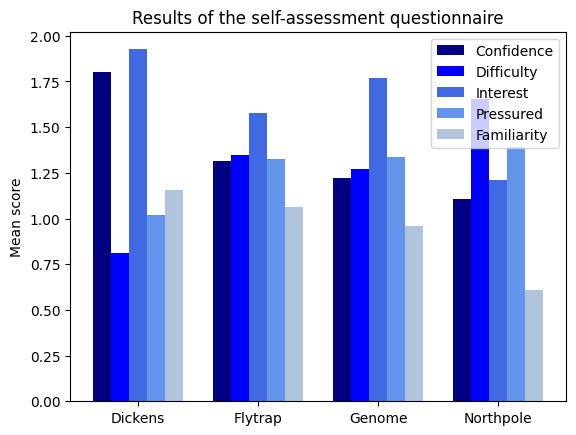

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the mean values for the different variables and texts
conf_means = [df_lab_dickens['confidence'].mean(), df_lab_flytrap['confidence'].mean(), df_lab_genome['confidence'].mean(), df_lab_northpole['confidence'].mean()]
diff_means = [df_lab_dickens['difficulty'].mean(), df_lab_flytrap['difficulty'].mean(), df_lab_genome['difficulty'].mean(), df_lab_northpole['difficulty'].mean()]
int_means = [df_lab_dickens['interest'].mean(), df_lab_flytrap['interest'].mean(), df_lab_genome['interest'].mean(), df_lab_northpole['interest'].mean()]
press_means = [df_lab_dickens['pressured'].mean(), df_lab_flytrap['pressured'].mean(), df_lab_genome['pressured'].mean(), df_lab_northpole['pressured'].mean()]
fam_means = [df_lab_dickens['familiarity'].mean(), df_lab_flytrap['familiarity'].mean(), df_lab_genome['familiarity'].mean(), df_lab_northpole['familiarity'].mean()]

# Set the labels for the x-axis and the positions of the bars
labels = ['Dickens', 'Flytrap', 'Genome', 'Northpole']
x_pos = np.arange(len(labels))

# Set the width of the bars
bar_width = 0.15

# Create the figure and axes objects
fig, ax = plt.subplots()

# Create the bar plots for each variable
ax.bar(x_pos, conf_means, bar_width, label='Confidence', color='navy')
ax.bar(x_pos + bar_width, diff_means, bar_width, label='Difficulty', color='blue')
ax.bar(x_pos + 2*bar_width, int_means, bar_width, label='Interest', color='royalblue')
ax.bar(x_pos + 3*bar_width, press_means, bar_width, label='Pressured', color='cornflowerblue')
ax.bar(x_pos + 4*bar_width, fam_means, bar_width, label='Familiarity', color='lightsteelblue')

# Set the tick labels and title
ax.set_xticks(x_pos + 2*bar_width)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean score')
ax.set_title('Results of the self-assessment questionnaire')

# Add the legend and show the plot
ax.legend()
plt.show()



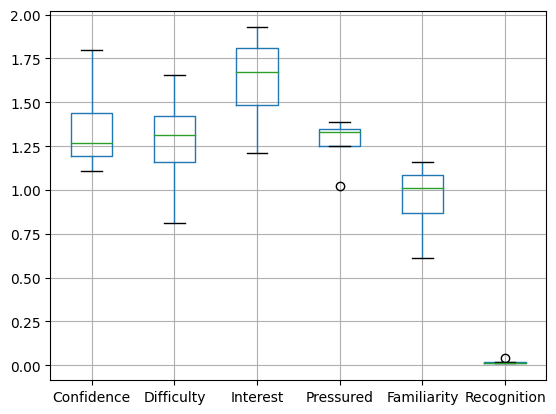

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the means for each variable and group
data = {'Confidence': [df_lab_dickens['confidence'].mean(),
                       df_lab_flytrap['confidence'].mean(),
                       df_lab_genome['confidence'].mean(),
                       df_lab_northpole['confidence'].mean()],
        'Difficulty': [df_lab_dickens['difficulty'].mean(),
                       df_lab_flytrap['difficulty'].mean(),
                       df_lab_genome['difficulty'].mean(),
                       df_lab_northpole['difficulty'].mean()],
        'Interest': [df_lab_dickens['interest'].mean(),
                     df_lab_flytrap['interest'].mean(),
                     df_lab_genome['interest'].mean(),
                     df_lab_northpole['interest'].mean()],
        'Pressured': [df_lab_dickens['pressured'].mean(),
                      df_lab_flytrap['pressured'].mean(),
                      df_lab_genome['pressured'].mean(),
                      df_lab_northpole['pressured'].mean()],
        'Familiarity': [df_lab_dickens['familiarity'].mean(),
                        df_lab_flytrap['familiarity'].mean(),
                        df_lab_genome['familiarity'].mean(),
                        df_lab_northpole['familiarity'].mean()],
        'Recognition': [df_lab_dickens['recognition'].mean(),
                        df_lab_flytrap['recognition'].mean(),
                        df_lab_genome['recognition'].mean(),
                        df_lab_northpole['recognition'].mean()]}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a box plot
df.boxplot()

# Show the plot
plt.show()

In [ ]:
# inspect columns where the text was recognized
df_lab_recognition = df_lab[df_lab["recognition"] == 1]
df_lab_recognition.head(20)

,subj,book,acc,confidence,difficulty,familiarity,recognition,interest,pressured,sleepiness,sleephours,acc_level,subj_acc,language,sex,native,subj_acc_level
24,msd008,dickens,0.6,2,1,2,1,2,1,2,2,2,0.55,Italian,F,0,1
62,msd020,genome,0.4,1,2,1,1,2,1,2,1,1,0.40,Spanish,F,0,0
120,msd036,dickens,1.0,2,1,2,1,3,1,1,1,3,0.65,Chinese,F,0,2
240,msd070,dickens,0.6,1,2,0,1,1,1,2,1,2,0.70,English,F,1,3
303,msd086,northpole,0.4,1,2,0,1,0,1,2,1,1,0.30,English,M,1,0
332,msd095,dickens,0.6,2,0,2,1,2,1,2,1,2,0.55,English,F,1,1
333,msd095,flytrap,0.8,3,1,3,1,2,0,1,1,3,0.55,English,F,1,1
